In [1]:
import requests

def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

save_file('https://homes.cs.washington.edu/~hschafer/cse416/a1/home_data.csv',
          'home_data.csv')

In [2]:
import pandas as pd

In [3]:
sales = pd.read_csv('home_data.csv') 
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Q1: How many houses are there?
len(sales)
# 21613

21613

In [6]:
# How many inputs are there? size of input
# price
len(sales.columns) - 1
# 20

20

In [17]:
# Q2
max(sales["bedrooms"]) # 33
for i in range(33):
    price = sales[sales["bedrooms"] == i]["price"] # access to price of bedroom no = i
    print("number of bedrooms", i, "average of price", price.mean())
# number of bedrooms 3 average of price 466232.07949918567

number of bedrooms 0 average of price 409503.6923076923
number of bedrooms 1 average of price 317642.88442211057
number of bedrooms 2 average of price 401372.6811594203
number of bedrooms 3 average of price 466232.07949918567
number of bedrooms 4 average of price 635419.5050857309
number of bedrooms 5 average of price 786599.8232354778
number of bedrooms 6 average of price 825520.6360294118
number of bedrooms 7 average of price 951184.6578947369
number of bedrooms 8 average of price 1105076.923076923
number of bedrooms 9 average of price 893999.8333333334
number of bedrooms 10 average of price 819333.3333333334
number of bedrooms 11 average of price 520000.0
number of bedrooms 12 average of price nan
number of bedrooms 13 average of price nan
number of bedrooms 14 average of price nan
number of bedrooms 15 average of price nan
number of bedrooms 16 average of price nan
number of bedrooms 17 average of price nan
number of bedrooms 18 average of price nan
number of bedrooms 19 average of

In [29]:
# Q3
len1 = len(sales[sales["sqft_living"] >= 4000]) # sqft >= 4000
len2 = len(sales[sales["sqft_living"] <= 2000]) # sqft <= 2000
1 - (len1 + len2)/len(sales) # 1 - sqft>=4000 - sqft<=2000

0.4215518437977144

In [38]:
# split the data into a training set and a test set
from sklearn.model_selection import train_test_split 
# random_state makes everything deterministic
train_data, test_data = train_test_split(sales, test_size = 0.2, random_state=0)  

Text(0, 0.5, 'Price')

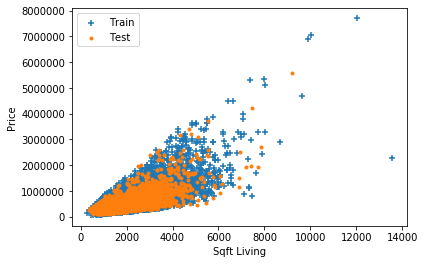

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot primarily takes 
#plt.scatter(sales['sqft_living'], sales['price'], marker='.')
plt.scatter(train_data['sqft_living'], train_data['price'], marker='+', label='Train') # train +
plt.scatter(test_data['sqft_living'], test_data['price'], marker='.', label='Test') # test .

# Code to customize the axis labels
plt.legend()
plt.xlabel('Sqft Living')
plt.ylabel('Price')

In [34]:
basic_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [35]:
advanced_features = basic_features + [
    'condition',      # condition of the house
    'grade',          # measure of qality of construction
    'waterfront',     # waterfront property 
    'view',           # type of view
    'sqft_above',     # square feet above ground
    'sqft_basement',  # square feet in basementab
    'yr_built',       # the year built
    'yr_renovated',   # the year renovated
    'lat',            # the longitude of the parcel
    'long',           # the latitide of the parcel
    'sqft_living15',  # average sq.ft. of 15 nearest neighbors 
    'sqft_lot15',     # average lot size of 15 nearest neighbors 
]

In [40]:
# train model
# basic_model using basic featues
# advanced_model using advanced features
from sklearn.linear_model import LinearRegression
basic_model = LinearRegression().fit(train_data[basic_features], train_data["price"])
advanced_model = LinearRegression().fit(train_data[advanced_features], train_data["price"])

In [47]:
# Q4
import math
from sklearn.metrics import mean_squared_error

basic_pred = basic_model.predict(train_data[basic_features])
basic_y = train_data["price"]
RMSE1 = math.sqrt(mean_squared_error(basic_y, basic_pred))
print(RMSE1) # RMSE for basic model (training data)

advanced_pred = advanced_model.predict(train_data[advanced_features])
advanced_y = train_data["price"]
RMSE2 = math.sqrt(mean_squared_error(advanced_y, advanced_pred))
print(RMSE2) # RMSE for advanced model

#258524.68484833534
#203805.41055524032

258524.68484833534
203805.41055524032


In [49]:
# Q5
basic_pred = basic_model.predict(test_data[basic_features])
basic_y = test_data["price"]
RMSE1 = math.sqrt(mean_squared_error(basic_y, basic_pred))
print(RMSE1) # RMSE for basic model (test_data)

advanced_pred = advanced_model.predict(test_data[advanced_features])
advanced_y = test_data["price"]
RMSE2 = math.sqrt(mean_squared_error(advanced_y, advanced_pred))
print(RMSE2)

#244004.7744310419
#190473.37570967645

244004.7744310419
190473.37570967645
